# Disomogeneità della distribuzione di ricchezza dei miliardari

### Abstract
In questo notebook si presenta un'analisi basata sul net worth dei miliardari negli anni 1996,2001 e 2014. Presentando un'ipotesi di distribuzione Paretiana della ricchezza e sviluppando un'analisi in maniera qualitativa e quantitativa. Si procede con la verifica del famoso principio di Pareto per la distribuzione della ricchezza, dopodichè si procede con un'analisi qualitativa e quantitativa della diseguaglainza di richezza tra i miliardari.

## Introduzione
Quando si parla di Net worth si intede il valore di tutti gli assets finanziari e non finanziari di proprietà di un individuo, ai quali si deve sottrarre i debiti dovuti a terzi (mutui, tasse, etc..). Questo è un modo utile per valutare la ricchezza personale di un individuo.\
In passato la distribuzione della ricchezza su tutta la popolazione è stata analizzata da Vilfredo Pareto il quale notò che l'80% dei possedimenti italiani era di proprietà del 20% della popolazione italiana. Da qui deriva l'idea del principio di Pareto che si enuncia normalmente dicendo che l'80% degli effetti deriva dal 20% delle cause. Il principio in se deriva da una distribuzione detta ditribuzione di Pareto, questa è sostanzialmente una legge di potenza inversamente proporzionale e verrà introdotta in seguito.\
Vi è da precisare che 80-20 deriva da specifici coefficienti della distribuzione e non è una legge generale.\
Ulteriori studi mostrano che in generale la ricchezza è distribuita secondo la distribuzione di Pareto. La domanda che ci sipuò porre è se anche agli estremi, in questo caso per i miliardari, vale la stessa distribuzione. Significherebbe che "zoommando" su una parte di popolazione si ri-ottiene la legge generale, una forma di frattale.

## Basic Data analysis
In seguito si procede legendo il file e con l'analisi iniziale dei dati.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy
from scipy.optimize import curve_fit,minimize
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import preprocessing
import networkx as nx

encoder = preprocessing.LabelEncoder() # Definisco un encoder nel caso mi serva

plt.rcParams.update({'font.size':18})# font leggibili

df = pd.read_excel('Billionaires1996,2001and2014updated.xlsx')#leggo i dati

df

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,NaN,...,founder,1956.0,1.830120e+11,NaN,NaN,NaN,http://www.jeraisy.com.sa/index.php/pages/rend...,NaN,NaN,NaN
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,relation,1960.0,1.030000e+11,NaN,inherited from father,NaN,NaN,NaN,NaN,NaN
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,founder,1968.0,1.577430e+11,NaN,NaN,NaN,http://www.arabianbusiness.com/arabian-busines...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,...,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
2610,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,...,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
2611,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,...,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
2612,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,...,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


Quindi si hanno 30 colonne di cui le ultime quattro sono le fonti, poi ci sono note su peculiarità dei miliardari, paese di provenienza e GDP, nord o sud del mondo nome e rank oltre alla richezza personale.\
Passando alla verifica della presenza di nan si notano alcune colonne che hanno nan e altre no, soffermandosi sulla colonna "networthusbillion" che è quella che interessa, non si hanno problemi. Un'altra peculiarità è che se si cercano di eliminare ciecamente tutti i nan dal data frame, questo scompare.Questo succede perche si eliminano tutte le righe ,uindi nel caso sia necessari bisogna procedere eliminando solo i dati dalle colonne necessarie.

In [2]:
df.isnull().any()

year                       False
name                       False
rank                       False
citizenship                False
countrycode                False
networthusbillion          False
selfmade                    True
typeofwealth                True
gender                      True
age                         True
industry                    True
IndustryAggregates          True
region                     False
north                      False
politicalconnection         True
founder                    False
generationofinheritance    False
sector                      True
company                     True
companytype                 True
relationshiptocompany       True
foundingdate                True
gdpcurrentus                True
sourceofwealth              True
notes                       True
notes2                      True
source                      True
source_2                    True
source_3                    True
source_4                    True
dtype: boo

In [3]:
df = df.drop(['notes','notes2','source','source_2','source_3','source_4'],axis=1)


Alcune colonne come le notes e source si eliminano, poichè non sono utili allo scopo della ricerca, infatti riportano curiosità o le fonti dei dati del data frame in questione.

Ora per poter capire come i dati sono corretlati si può disegnare una heatmap della matrice di correlazione e poi plottare il risultato, questo però diventa dispersivo a causa delle 24 colonne di dati, mentre lo scopo è focalizzarsi sul net worth. Per avere una migliore visualizzazione si possono usare i network e comunque ottenere informazioni sulle varie correlazioni.\
Per fare ciò bisogna però osservare il tipo di dati in ogni colonna

In [4]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
dtype: object

Come si vede alcune colonne sono numeri altre no, per esempio la colonna generationofinheritance ha sia tipo int che string, per cui per avere una correlazione completa bisogna usare un encoder e gestire gli errori che possono nascere.

In [5]:
head = df.columns
df_enc = df.copy()
for i in head: 
    try: #Trasformo i dati utilizzando un encoder
        df_enc[i] = encoder.fit_transform(df_enc[i])
    except: # Gestisce gli errori
        df_enc[i] = df_enc[i].apply(str)
        df_enc[i] = encoder.fit_transform(df_enc[i])

A questo punto si può procedere creando il network

In [6]:
# Trasformo in un link dataframe da 3 colonne
corr = df_enc.corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

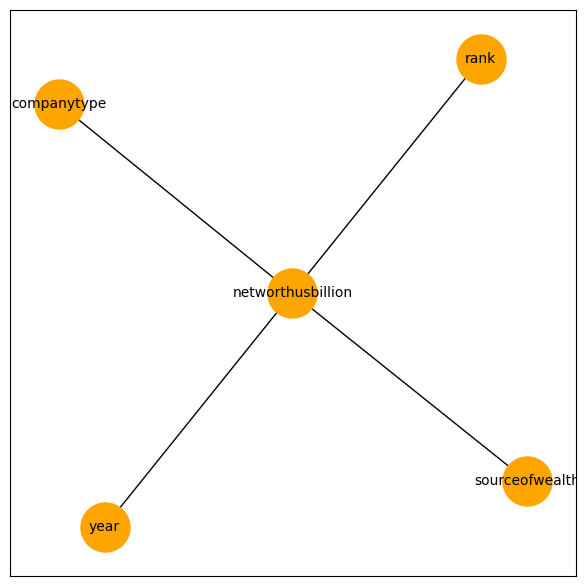

                  var1            var2     value
120  networthusbillion            year  0.120291
122  networthusbillion            rank -0.692479
139  networthusbillion     companytype -0.149488
143  networthusbillion  sourceofwealth -0.137317


In [7]:
#Impongo un limite evito autocorrelazione e focalizzo su networthusbillion
links_filtered=links.loc[ (np.abs(links['value']) > 0.1) & (links['var1'] != links['var2']) &  (links['var1']=='networthusbillion') ]


# costruisco il grafo
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

# Plot del network:

fig, ax = plt.subplots(figsize=(6.2, 6.2))

nx.draw_networkx(G, with_labels=True,
        node_color='orange',
        node_size=800, 
        edge_color='black', 
        linewidths=8, font_size=10,ax=ax)

plt.tight_layout()
plt.show()

print(links_filtered)

**Figura 1:** Il grafico rappresenta le colonne del dataframe con valore assoluto di correlazione maggiore di 0.1 rispetto al net worth. Quindi si vede che, come ci si aspetta, c'è una anti correlazione evidente con il rank, leggere anti correlazioni con il tipo di business e il tipo di compagnia, e una correlazione significativa con l'anno.

Ovviamente siccome la ricchezza personale è usata per stimare la classifica dei miliardari ci si aspetta un rapporto inversamente propozionale e quindi una anti correlazione. Per quanto riguarda il tipo di business e compagnia le leggere anticorrelazioni potrebbero significare che ci sono aziende o tipologie di affari che fruttano di più o sono più spesso presenti in questo dataframe. Il fatto che ci sia una leggera correlazione con l'anno non è banale, può significare che il numero di miliardari sta aumentando con il passare del tempo o il loro capitale sta aumentando.Questa correlazione può essere presente per via dell'inflazione.

Ora che si è analizzata la correlazione, si può passare ad analizzare i dati nello specifico anno per anno.


In [8]:
years = np.sort(df['year'].unique())
for i in years:
    print("Anno:",i)
    print(df[df['year']==i]['networthusbillion'].describe())

Anno: 1996
count    423.000000
mean       2.481087
std        2.046711
min        1.000000
25%        1.300000
50%        1.900000
75%        2.850000
max       18.500000
Name: networthusbillion, dtype: float64
Anno: 2001
count    538.000000
mean       3.213011
std        4.433643
min        1.000000
25%        1.300000
50%        1.900000
75%        3.300000
max       58.700000
Name: networthusbillion, dtype: float64
Anno: 2014
count    1653.000000
mean        3.904658
std         5.748520
min         1.000000
25%         1.400000
50%         2.100000
75%         3.700000
max        76.000000
Name: networthusbillion, dtype: float64


Da questa descrizione si può vedere che la maggior parte dei miliardari si trovano nell'anno 2014, e sono aumentati con gli anni, inoltre la mediana per 1996 e 2001 è la stessa e leggermente più alta nel 2014. Quello che è aumentato significativamente è il massimo, cioè la ricchezza della persona più ricca. Inoltre osservando i percentili è evidente che non si può avere una ditribuzione uniforme o normale della ricchezza ma deve essere una distribuzione che si comporta come una coda, infatti si ha un crescità graduale fino al 75% per poi avere una crescita enorme fino al 100%. Questa caratteristica significa che fino al 75% delle persone hanno una minore ricchezza pro capite rispetto al restante 25%, cioè si ha un distribuzione monotona decrescente che tende a zero al crescere della ricchezza personale. Questa può essere di varia natura,due distribuzioni note con queste caratteristiche sono esempio Pareto o esponenziale.


# Distribuzione di Pareto

Ora che si sono visualizzate le connessioni del networth e verificato le caratteristiche di dati, si procede a plottare anno per anno l'istogramma dei dati e si noterà subito che sembrano seguire effettivamente una legge di potenza inversamente proporzionale o una legge esponenziale. A tal scopo si presenta la distribuzione di Pareto.

La distribuzione di Pareto è implementata nella libreria scipy ed è data da $$\rho(x) =\frac{b}{x^{b+1}}\quad \text{con}\, x \geq 1\, \land b>0 $$

$$ F(x)= 1- x^{-b} $$

Questa è la forma "standard" si può shiftare e riscalare con $ x = (y-\mu)/\sigma$, per avere una forma più generale, anche se rimane un pò restrittiva.\
La distribuzione così scritta presenta valore di aspettazione
$$<x> = \frac{b}{b-1} \quad b>1$$
e varianza
$$\sigma^2 = \frac{b}{(b-2)(b-1)^2}  \quad b>2$$

Se i vincoli non sono rispettati valore di aspettazione e/o varianza vengono posti uguali a infinito.


## Analisi qualitativa

Per iniziare ci si può restringere a dei dati, per esempio per l'anno 2001, e vedere qualitativamente come si comportano i dati e i fit.

(1.5737323354363313, -0.5073904043757, 1.5073904043756998)

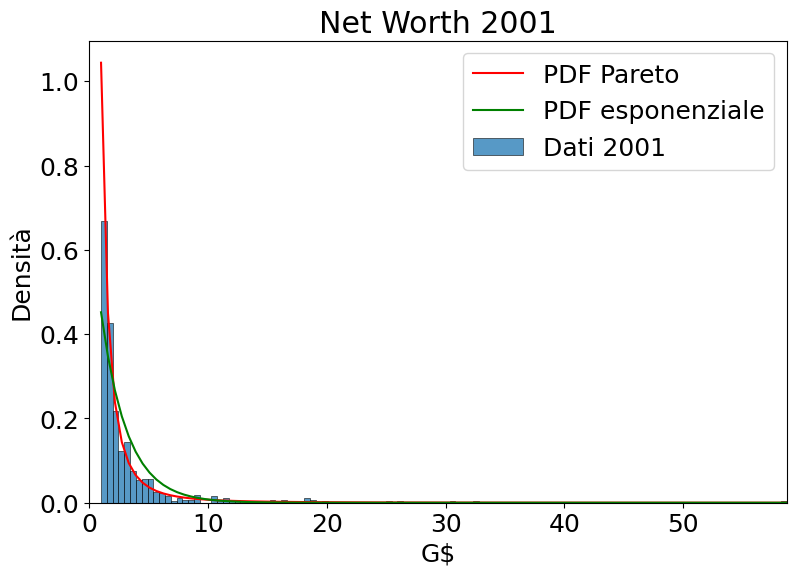

In [9]:
years = np.sort(df['year'].unique())

x_min =np.min((df[df['year']==2001])['networthusbillion'])
x_max = np.max((df[df['year']==2001])['networthusbillion'])
x = np.linspace(x_min,x_max,100)
    
plt.figure(figsize=(9,6))
# dati e fit
data_test =(df[(df['year']==2001)])['networthusbillion']
b,loc,scale = stats.pareto.fit(data_test) 
a,c = stats.expon.fit(data_test)

#plot 
sns.histplot(df[(df['year']==2001)],x='networthusbillion',stat='density',label='Dati 2001')
plt.plot(x,stats.pareto.pdf(x,b,loc,scale),color='red',label='PDF Pareto')
plt.plot(x,stats.expon.pdf(x,a,c),color='green',label='PDF esponenziale')
plt.xlabel( 'G$')
plt.ylabel('Densità')
plt.xlim(0,x_max)
plt.legend()
plt.title("Net Worth 2001")
b,loc,scale

**Figura 2:** Istogramma che riporta sull'asse delle ascisse il net worth in unita di miliardi di dollari, sull'asse delle ordinate il numero di miliardari normalizzato, cioè la densità. La linea rossa rappresenta un fit attraverso MLE della distribuzione di Pareto, quella verde della esponenziale.

A prima vista il fit sembrerebbe buono per Pareto, la curva teorica sembra rappresentare bene i dati, ma per esserne sicuri bisogna fare un test statistico in particolare un test di Kolmogorov–Smirnov.\
La curva esponenziale invece non sembra rappresentare bene i dati.\
Prima di fare ciò si può considerare anche un distribuzione di Pareto leggermente modificata, così da soddisfare alcune proprietà.

## Distribuzione di Pareto modificata

Si può una distribuzione di Pareto che ha forma $$\rho(x) = b\frac{\sigma^{b+1}}{(x-\mu)^{b+1}} $$ a questa poi si possono applicare due condizioni sulla cdf: $F(\infty) = 1$ e $F(x_{min}) = 0$. Si ottiene così la relazione $\sigma^{b+1} = (x_{min} -\mu)^b$.

Ora sostituendo il risultato si ha che
  
$$\rho(x) = b \frac{\left(x_{min}-\mu\right)^b}{\left(x-\mu\right)^{b+1}} $$

$$F(x) = 1 - \left(\frac{x_{min}-\mu}{x-\mu}\right)^b$$

### Proprietà della funzione modificata

Il valore d'aspettazione è data da
$$ <x> = \frac{bx_{min} - \mu}{b-1}\quad b>1  $$
Mentre la varianza è data da
$$\sigma^2 = \frac{b (x_{min} -\mu)^2}{(b-2)(b-1)^2}\quad b>2 $$

E valore infito quando non si rispettano le condizioni.\
Queste manipolazioni sono state fatte per avere leggeremente più libertà rispetto alla distribuzione data da scipy.\
Ora è necessario fittare i dati e eseguire un test di Kolmogorov-Smirnov, per le tre distribuzioni. Poi si presenta una rappresentazione grafica della bontà o meno del fit rispetto alla cumulativa.

## Test di Kolmogorov-Smirnov e fit sui dati

<Figure size 900x600 with 0 Axes>

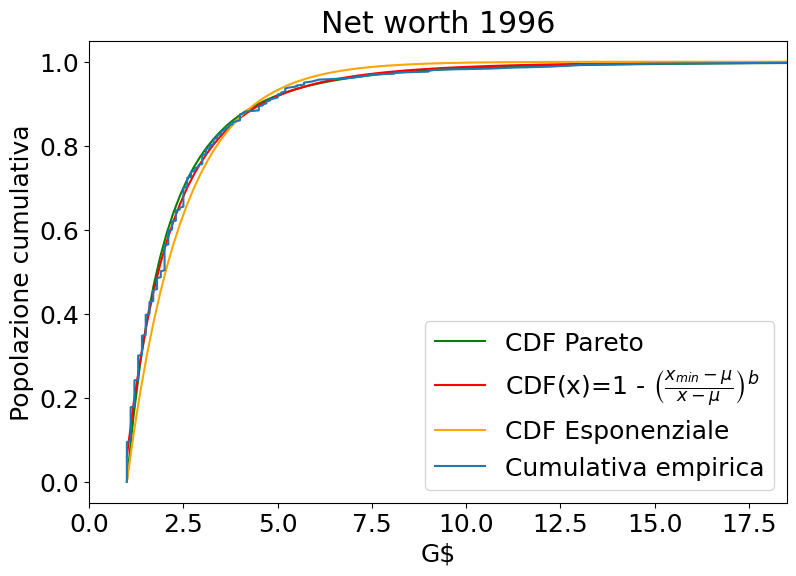

<Figure size 900x600 with 0 Axes>

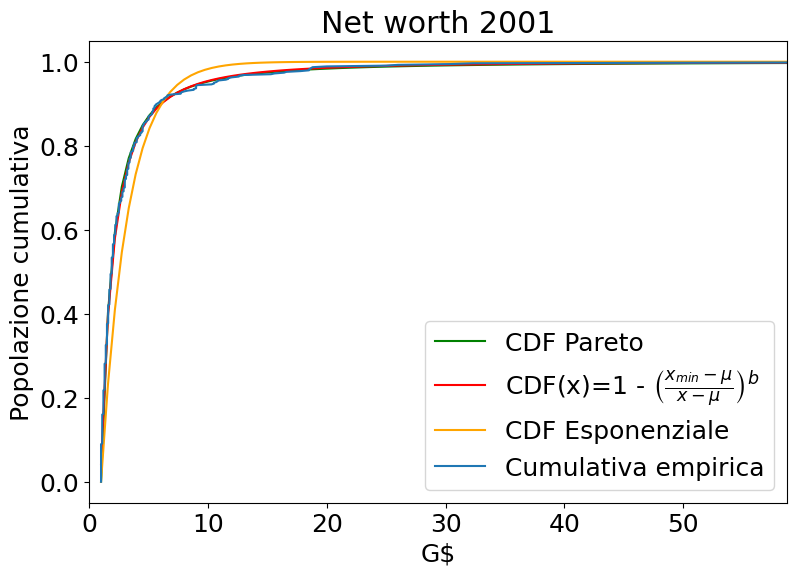

<Figure size 900x600 with 0 Axes>

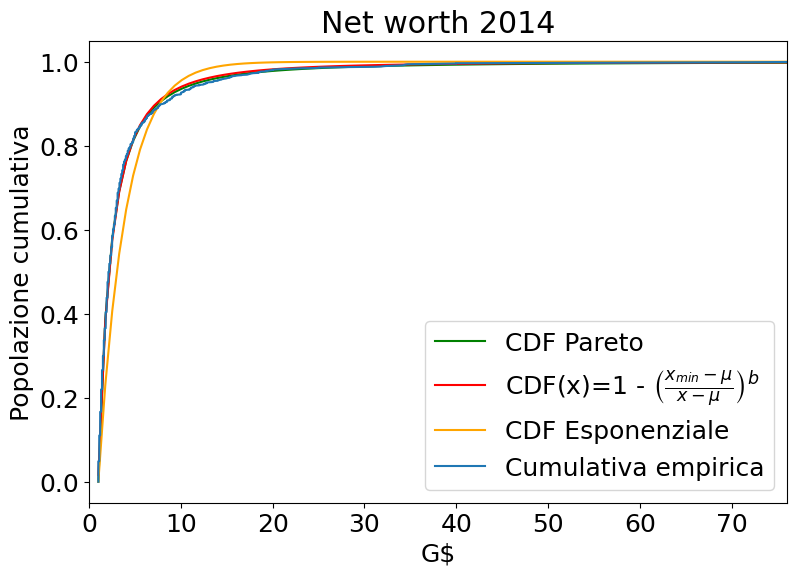

In [13]:
def power_pdf(x,x_min,mu,b): #pdf pareto modificata
    return (b*(x_min-mu)**b)/(x-mu)**(b+1)

def power_cdf(x,x_min,mu,b): #cdf pareto modificata
    return 1. - ((x_min-mu)/(x-mu))**(b)
    

years = np.sort(df['year'].unique())

arr = []

# Itero sugli anni
for i in years:
    
    plt.figure(figsize=(9,6))
    
    j=0 
    x_min = np.min((df[df['year']==i])['networthusbillion'])
    x_max = np.max((df[df['year']==i])['networthusbillion'])

    x = np.linspace(x_min,x_max,100)
    plt.figure(figsize=(9,6))
    
    #definisco i dati da utilizzare
    data_test =(df[(df['year']==i)])['networthusbillion']
    data_test = np.array(data_test)
    
    #costruisco la cumulativa empirica
    y1=np.sort(data_test)
    idx1 = [ j/len(y1) for j in range(len(y1))]
    
    #fit
    b,loc,scale = stats.pareto.fit(data_test) 
    parameters, covariance = curve_fit(power_cdf,y1,idx1,p0=[x_min,-1.,b],maxfev=100000)
    a,c = stats.expon.fit(data_test)
    
    # parametri salvati per anno 
    arr.append(parameters)
    
    #plot distribuzioni
    plt.plot(x,stats.pareto.cdf(x,b,loc,scale),color='green',label='CDF Pareto')
    plt.plot(x,power_cdf(x,parameters[0],parameters[1],parameters[2]),color='red',label='CDF(x)=1 - 'r"$\left(\frac{x_{min}-\mu}{x-\mu}\right)^b $")
    plt.plot(x,stats.expon.cdf(x,a,c),color="orange",label="CDF Esponenziale")
    
    #eseguo i vari test di KS
    KS_test = scipy.stats.kstest(data_test,lambda x:scipy.stats.pareto.cdf(x,b,loc,scale))
    KS_fit = scipy.stats.kstest(data_test,lambda x:power_cdf(x,parameters[0],parameters[1],parameters[2]))
    KS_exp = scipy.stats.kstest(data_test,lambda x:scipy.stats.expon.cdf(x,a,c))
    
    #plot cumulatica empirica
    plt.plot(y1,idx1,label='Cumulativa empirica')
    
    plt.xlim(0,x_max)
    plt.xlabel('G$')
    plt.ylabel('Popolazione cumulativa')
    plt.title("Net worth {}".format(i))
    plt.legend()
    

**Figura 3:** Nelle figure sono mostrate le cumulative empiriche e i fit per distribuzione esponenziale, Pareto e Pareto modificata. Sull'asse delle ascisse vi è la ricchezza in miliardi di dollari, mentre sulle ordinate, il totale dei miliardari normalizzato.

Quindi dai grafici si evince chiaramente che la distribuzione esponenziale, non descrive bene i dati, mentre le altre due distribuzioni sembrerebbero dare una buona descrizione dei dati. In seguito viene riportata una tabella con i vari p value per ogni anno.
| Anno | 1996 | 2001 |2014|
| --- | --- | --- | ---|
|p value esponenziale | 1.0673040730175386e-05| 5.554084188678184e-20 | 5.073425124331284e-50 |
| p value Pareto | 0.0006541884509268038| 0.0002469829366910801 | 0.000688489800119178 |
| p value Pareto modificata | 0.08645766809419364 | 0.14509734303656818 | 0.05645314173834537 |

Quindi assumendo indifferentemente $\alpha =0.05$ o $\alpha =0.01$, il risultato non cambia. Si vede che l'ipotesi nulla che la distribuzione esponenziale o quella "classica" di Pareto descrivano bene i dati va rigettata poichè $p <\alpha$.\
Si evince invece che per la distribuzione di Pareto modificato non si può rigettare l'ipotesi nulla poichè $p >\alpha$ e può essere presa in considerazione per descrivere l'andamento dei dati. Attraverso questa assunzione si può cercare di stimare la distribuzione della ricchezza.

## Curva di Lorenz e principio di Pareto

Un modo per valutare graficamente la distribuzione della ricchezza è la curva di Lorenz. Questa curva è una funzione della proporzione cumulativa degli individui mappata nella corrispondente proporzione cumulativa della loro ricchezza, quindi è una curva che assume valori da (0,0) a (1,1). La funzione è data da

$$ L(F(x)) = \frac{\int_{-\infty}^x t\rho(t)\,dt}{<x>} $$

Dove F è la cumulative e $\rho$ è la densità di probabilità.\
**I punti della curva di Lorenz rappresenta espressioni come: "L'80% della popolazione possiede il 20% della ricchezza"** e viceversa.
Se tutti gli individui hanno la stessa richezza allora la curva di Lorenz è la mappa identità, che significa che c'è completa equità, viceversa se tutta la ricchezza appartirene ad un individuo si ha una delta attorno a (1,0) cioè completa diseguaglianza.


Si procede quindi implementando la curva di Lorenz e trovando i punti sulla curva di Lorenz. Da notare che la curva di Lorenz così definita è parametrica, per trovare il valore del parametro bisogna invertire la cumulativa trovata in precedenza e poi sostituire tale valore nella funzione di Lorentz. L'obbiettivo ora è vedere come cambia il pricipio di Pareto per l'80% dei miliardari.


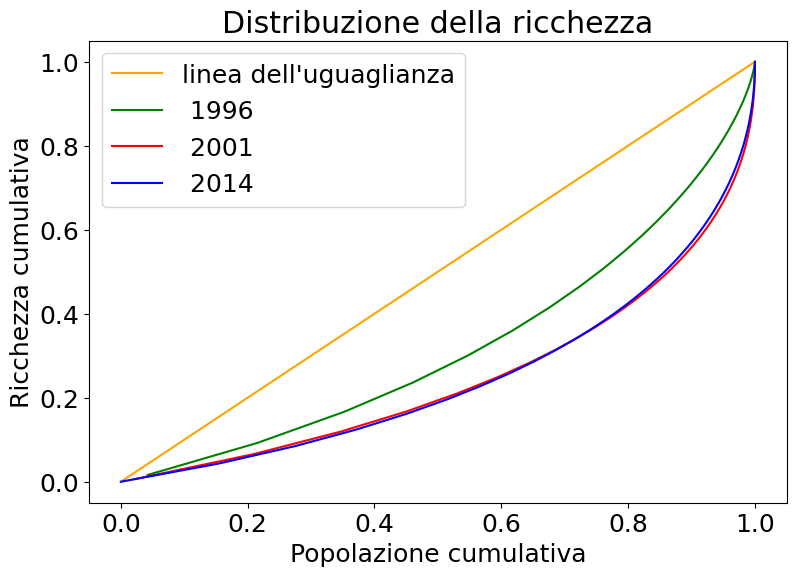

In [14]:
# funzione di lorenz
def lorentz(x,par0,par1,par2):
    b = par2
    mu = -par1
    y = par0
    mean= (mu + b*y)/(b-1)
    return ((mu + b*y - (mu + x)**(-b)*(mu + b*x)*(mu + y)**b)/(-1 + b))/mean

#inversa della cdf
def inverse_cdf(alpha,x_min,mu,b):
    return mu +(x_min -mu)/(1-alpha)**(1/b)

#plot linea uguaglianza
plt.figure(figsize=(9,6))
y= np.linspace(0,1,400)
plt.plot(y,y,c='orange',label="linea dell'uguaglianza")

lor = []

parameter = np.empty(3)
#itero sugli anni
for i in enumerate(years):
    
    color = ['green','red','blue']
  
    parameter[0],parameter[1],parameter[2] = arr[i[0]]
    

    # definisco il minimo per avere un plot tra (0,1) sulle ascisse
    x_min = parameters[0]
    x= np.linspace(x_min,10000,40000)
   # print(parameters[0],parameters[1],parameters[2])
    
    # trovo i valori di richezza posseduti dall'80% della popolazione
    eighty = inverse_cdf(0.8,parameter[0],parameter[1],parameter[2])
    lor.append(lorentz(eighty,parameter[0],parameter[1],parameter[2]))
    
    #plot
    plt.plot(power_cdf(x,parameter[0],parameter[1],parameter[2]),lorentz(x,parameter[0],parameter[1],parameter[2]),
            color = color[i[0]],label= ' {}'.format(i[1]))
    
    plt.xlabel('Popolazione cumulativa')
    plt.ylabel('Ricchezza cumulativa')
    plt.legend()
    plt.title('Distribuzione della ricchezza')

**Figura 4:** La figura mostra la curva di Lorenz nei diversi anni. Sull'asse delle ascisse vi è la popolazione cumulativa, mentre su quello delle ordinate al ricchezza cumulativa.

Si nota che la curva tende ad abbassarsi procedendo con gli anni, simbolo di una diseguaglianza nella distribuzione della richezza, invertendo la cumulativa della distribuzione di Pareto modificata si può trovare che percentuale della richezza possiede l'80% dei miliardari.

In [15]:
print(lor)

[0.5564217581079247, 0.42050508092752525, 0.42497897325158646]


Quindi in questo caso prendendo per esempio il 2014 si può dire che l'80% dei miliardari ho il 42,5% della ricchezza, e quindi il 20% dei miliardari ha il 57.5% della ricchezza. \
È  evidente dal grafico che le curve di Lorenz si stanno abbassando sintomo di una distribuzione meno uniforme della ricchezza.

Ora non è lampante se è distribuita in maniera equa o meno. Un modo quantitativo per misurare la diseguaglianza della distribuzione di ricchezza è calcolare il coefficiente di Gini. Questo coefficiente si calcola prendendo il rapporto tra l'area compresa tra la curva di Lorentz e la retta di perfetta uguaglianza rispetto all'area data dalla retta di perfetta uguaglianza.\
Un coefficiente di Gini pari a 1 indica completa diseguaglianza, mentre zero indica completa uguaglianza.

Un modo per calcolare il coefficiente di Gini nel caso di una popolazione discreta con valori $x_i$ con $i = 1,\dots,n$ è data da

$$\displaystyle G = \frac{\sum_{i=1}^n \sum_{j=1}^n |x_i - x_j|}{2n\sum_{i=1}^n x_i} = \frac{\sum_{i=1}^n \sum_{j=1}^n |x_i - x_j|}{2 n^2 \bar{x}} $$
Dove $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$

In [16]:
#Gini
def gini(x):
    totale = 0
    for i, xi in enumerate(x[:-1], 1):# oppure :-1
        totale += np.sum(np.abs(xi - x[i:]))
    return totale / (len(x)**2 * np.mean(x)) 

for i in years:

    inc = ((df[(df['year']==i)])['networthusbillion'])
    inc = np.array(inc)

    print("Coefficiente di Gini nel {}: ".format(i),gini(inc))


Coefficiente di Gini nel 1996:  0.35357870515848494
Coefficiente di Gini nel 2001:  0.46861568357744443
Coefficiente di Gini nel 2014:  0.5006950149380597


Quindi come si può vedere i coefficienti di Gini aumentano con gli anni, almeno in questi campioni. Se ciò fosse generale significa che la diseguarglianza sta aumentando sempre di più anche tra i più ricchi. Si hanno comunque dei coefficienti di Gini non bassi, quindi si ha una diseguaglianza nella distribuzione di denaro tra i miliardari e questa aumenta col tempo.

## Conclusioni

Dall'analisi dei dati sembrerebbe che questi siano in buon accordo con la distribuzione definita nel notebook, quindi non solo vale questa distribuzione per tutta la popolazione, ma sembrerebbe anche per sottoclassi come i miliardari anche se magari in maniera meno netta. Sarebbe anche curioso verificare se questo andamento si presenta nel caso delle singole nazioni e verificare se anche in questo caso si presentano disomogeneità.\
In genreale si è anche visto i miliardari sembrano aumentare con il tempo come anche il capitale totale dei miliardari, questo però è anche accompagnato da una maggiore diseguaglianza (descritta dal principio di Pareto), la quale aumenta col passare del tempo. Ci sono ulteriori fattori che andrebbero presi in considerazione quale l'inflazione, e se i miliardari con più richezza sono sempre gli stessi che diventano più ricchi o vi è un ricambio, oppure se un settore predomina sugli altri in fatto di capitale o sono più o meno ugualmente distribuiti.